##  Support Vector Machines (SVM)
### Face Recognition

We will use SVM to create a Face Recognition (FR) system.  We will use a dataset that comes with one of Python Libraries. It consists of several thousand photos of various public figures.  




### Load Data 
First, lets load the dataset from within Pyhon library using the `fetch` method. You can read more about the dataset at https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html.
    
Load the Labeled Faces in the Wild (LFW) people dataset.which is a database of face photographs designed for studying the problem of unconstrained face recognition. get the data, with 60 images per person. then print target_names and images.shape for all faces.

In [9]:
import warnings
warnings.filterwarnings('ignore')# ignore warnings 

from sklearn.datasets import fetch_lfw_people # this is the dataset
# get the data, with 60 images per person 
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


### Explore the Dataset

 We can view some of the images in the dataset. Below, we view few images along with the names.create grid of 5 x 3 to sohw images, and the subplots() function takes three arguments that describes the layout of the figure(rows , columns , (length, width)).




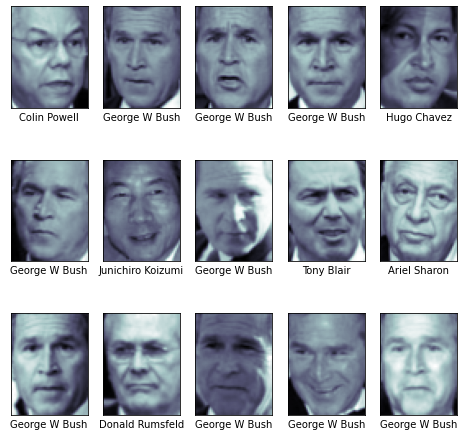

In [12]:
# create grid of 5 x 3 to sohw images
from matplotlib import pyplot as plt
fig, ax = plt.subplots(3, 5,figsize=(8,8))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

Each image contains [62×47] or 2914 pixels.in this task we will use something called Principle Component Analysis (PCA).lets use it to reduce the dimension without causing much information loss

### Pre-process and Model's Creation 

here we will use a principal component analysis (PCA) to extract 150 fundamental components to feed into our support vector  classifier(SVC).

In [13]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

# create dimenssion reduction 
pca = PCA(n_components=150, whiten=True, random_state=42)
# create your SVM model with RBF kernel 
svc = SVC(kernel='rbf', class_weight='balanced')
# your pipline 
model = make_pipeline(pca, svc)

### Train / Test Split
we need to evaluate the model,  so we will divide the data set into training set and test set


In [14]:
from sklearn.model_selection import train_test_split
# random_state is for results reproduction 
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [15]:
# check the shape of the data
print(f'The size of the Training set is {X_train.shape[0]}')
print(f'The size of the Training set is {X_test.shape[0]}')
# notice the number of column in the dataset
print(f'The number of columns in the training and testing set is {X_train.shape[1]}')


The size of the Training set is 1011
The size of the Training set is 337
The number of columns in the training and testing set is 2914


In [16]:
# You should know the data types of X_train / y_train (numpy array)
print(f'Type of X_train {type(X_train)}')
print(f'Type of y_train {type(y_train)}')

Type of X_train <class 'numpy.ndarray'>
Type of y_train <class 'numpy.ndarray'>


### Hyperparameter Tuning
we can use a grid search to explore combinations of parameters.Here we will adjust C and gamma, these two parameters are important for the performance of the module.

In [17]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

* Now, fit the data and search for the best parameters 

In [19]:
warnings.filterwarnings('ignore')# ignore warnings 

grid.fit(X_train, y_train)
best_params = grid.best_params_

In [20]:
# check best parameters
print(best_params)

{'svc__C': 10, 'svc__gamma': 0.001}


### Best Model Fit

In [22]:
# best model we have 
model = grid.best_estimator_
y_predicted = model.predict(X_test)

Let's take a look at a few of the test images along with their predicted values, We will flag wrong predictions with red labels along the images :

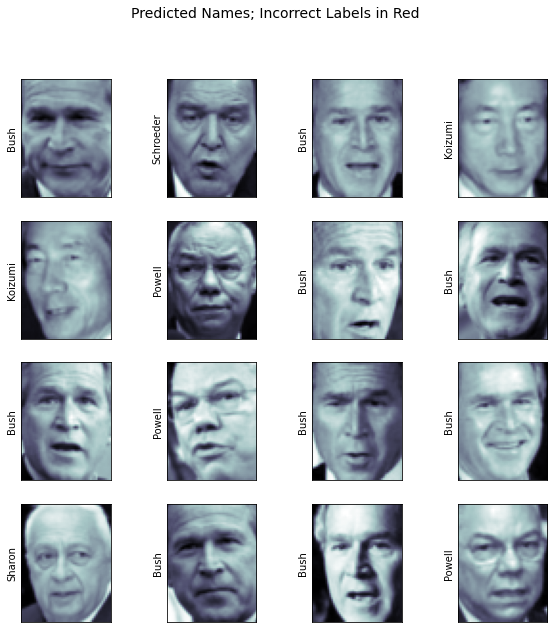

In [26]:
fig, ax = plt.subplots(4, 4,figsize=(10,10))
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[y_predicted[i]].split()[-1],
                   color='black' if y_predicted[i] == y_test[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);


* in this small sample, our  estimator didnt mislabeled for any face. Lest now look at evaluation metrics to assess the quality of our model: 

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



    Precision = number of correctly predicted (TP) / number of correctly predicted (TP+FP)
    Recall = number of correct predictions (TP) / number of predictions (TP+FN)
    F1 = 2 Precision recall / (precision + recall)
    
  * We might also display the confusion matrix between these classes:


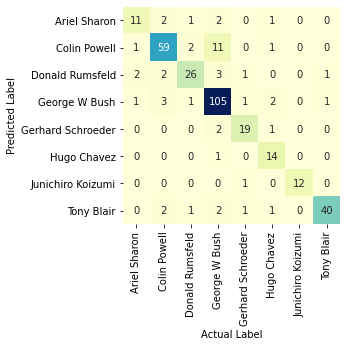

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# compare the actual label against the predicted label
mat = confusion_matrix(y_test, y_predicted)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,cmap="YlGnBu",
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label');

* This helps us get a sense of which labels are likely to be confused 

## Save the Model 

In [29]:
import pickle
# Save to file in the current working directory
pkl_filename = "svm_model.pkl"
# save your model that was created above (lg_model)
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

* And, you can always load it and re-use it, without the need to retrain it again, as follows: 

In [30]:
# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
# Lets test the mode loaded from a file and check results
score = pickle_model.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
y_hat = pickle_model.predict(X_test)

Test score: 84.87 %


In [33]:
import pandas as pd  
# you can save your test set as a data frame as below
df = pd.DataFrame(X_test)
# add the label 
df['Label']=y_test
# save to csv
df.to_csv('Xy_test.csv', index=False)

## A code to view specific image (two images) 

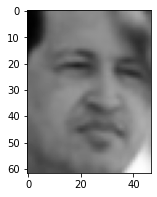

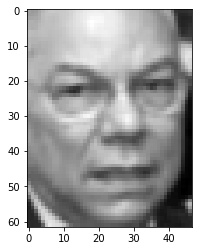

In [44]:

# set figure size 
fig = plt.figure(figsize=(3,3))
# split features and labels into two differen dataframes 
features = df.loc[:, df.columns != 'Label']
labels = df['Label'].to_numpy()

# Change i to view different images 
i = 23
# notice we convert it to numpy array and reshape it
image_to_show = features.iloc[i].to_numpy()
# reshape it to fit our model
image_to_show = image_to_show.reshape(62,47)
#fig.suptitle('This is ',labels[0:1], size=14);
label= faces.target_names[labels[i]]
if 1==1:
    color='black'
else:
    color = 'red'
#fig.suptitle(label, size=14);

plt.imshow(image_to_show, cmap=plt.get_cmap('gray'))

plt.show() 
#############
j = 15
# notice we convert it to numpy array and reshape it
image_to_show = features.iloc[j].to_numpy()
# reshape it to fit our model
image_to_show = image_to_show.reshape(62,47)
#fig.suptitle('This is ',labels[0:1], size=14);
label= faces.target_names[labels[j]]
if 1==1:
    color='black'
else:
    color = 'red'
#fig.suptitle(label, size=14);

plt.imshow(image_to_show, cmap=plt.get_cmap('gray'))

plt.show() 

* perform some predictions using the loaded model


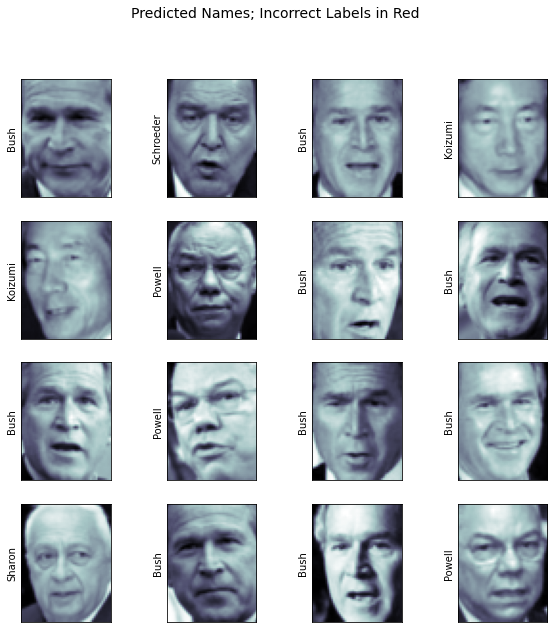

In [45]:
y_predictedp = pickle_model.predict(X_test)

fig, ax = plt.subplots(4, 4,figsize=(10,10))
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[y_predicted[i]].split()[-1],
                   color='black' if y_predictedp[i] == y_test[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);